# Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('load_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df=df.drop(columns=['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Preprocessing the dataset

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [8]:
#fill nulls for categorical attributes
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
#fill nulls for numerical attributes
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# from google.colab import files
# df.to_csv('loan_training.csv') 

# Exploratory Data Analysis

/tmp/ipykernel_47928/1805243942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

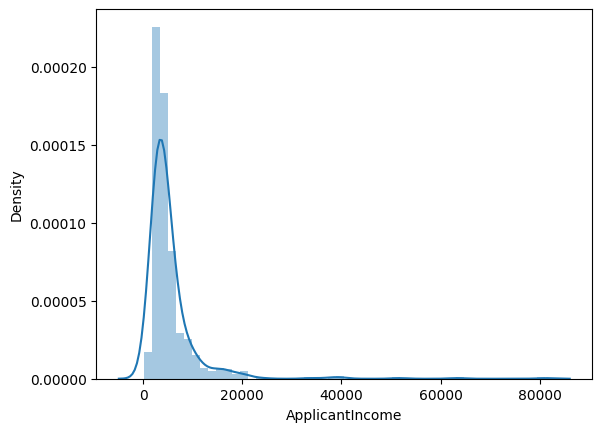

In [12]:
#visualize numerical attributes
sns.distplot(df['ApplicantIncome'])

/tmp/ipykernel_47928/2149142820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

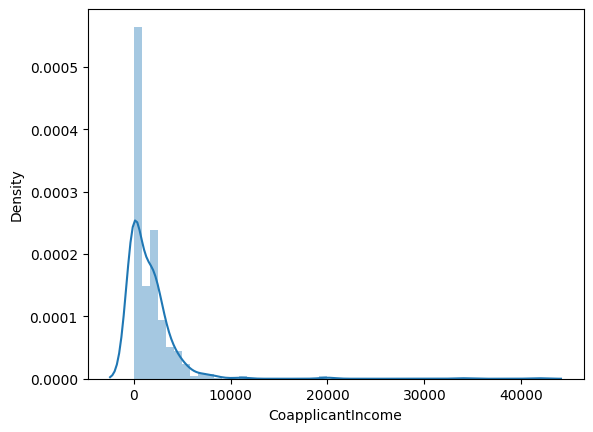

In [13]:
sns.distplot(df['CoapplicantIncome'])

/tmp/ipykernel_47928/413488336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

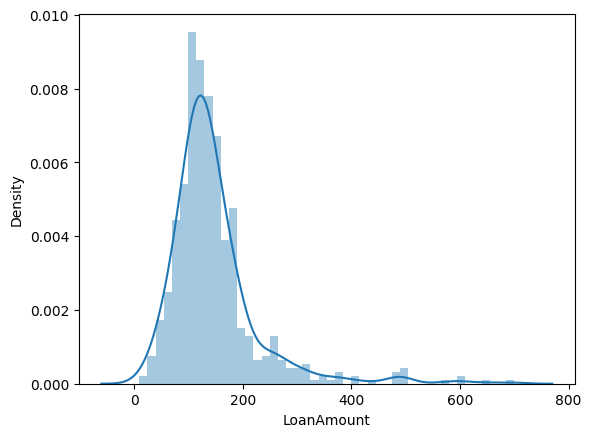

In [14]:
sns.distplot(df['LoanAmount'])

/tmp/ipykernel_47928/710718432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

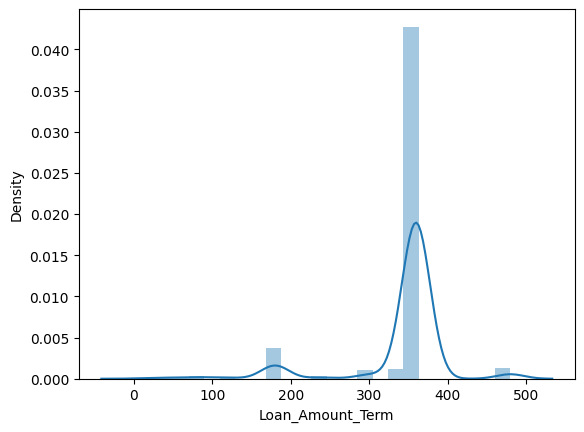

In [15]:
sns.distplot(df['Loan_Amount_Term'])

/tmp/ipykernel_47928/4144326787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'])


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

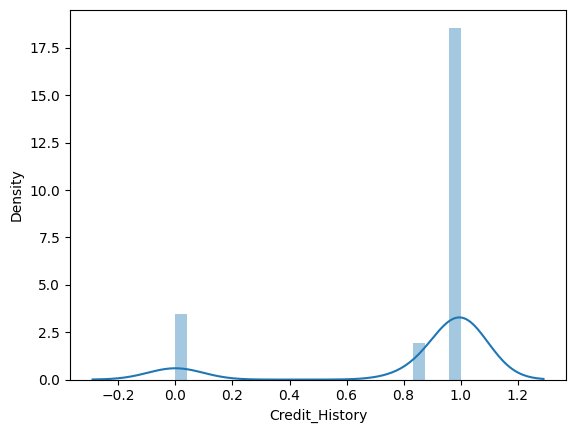

In [16]:
sns.distplot(df['Credit_History'])

In [17]:
#visualize categorical data
sns.countplot(df['Property_Area'])

ValueError: could not convert string to float: 'Urban'

In [ ]:
sns.countplot(df['Loan_Status'])

ValueError: could not convert string to float: 'Y'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

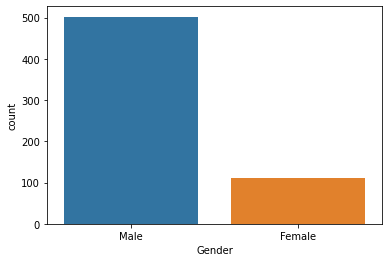

In [ ]:
sns.countplot(df['Gender'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

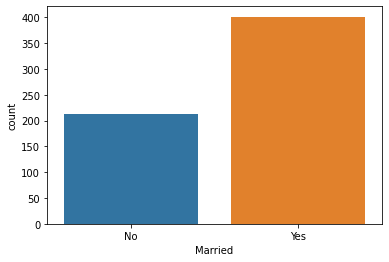

In [ ]:
sns.countplot(df['Married'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

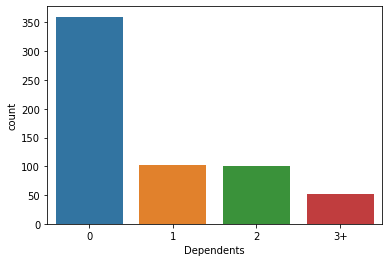

In [ ]:
sns.countplot(df['Dependents'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

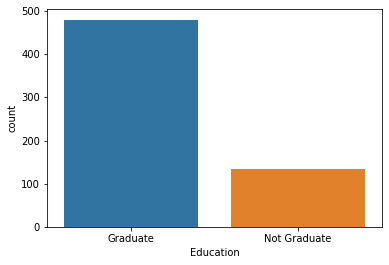

In [ ]:
sns.countplot(df['Education'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

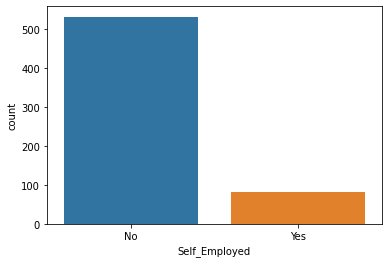

In [ ]:
sns.countplot(df['Self_Employed'])

In [18]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log Transform

In [ ]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
df['Credit_History_Log'] = np.log(df['Credit_History']+1)
df['TotalIncomeLog'] = np.log(df['TotalIncome']+1)

In [ ]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','TotalIncome']
df=df.drop(columns=cols)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
0,Male,No,0,Graduate,No,Urban,Y,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,Male,Yes,1,Graduate,No,Rural,N,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,Male,Yes,0,Graduate,Yes,Urban,Y,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,Male,Yes,0,Not Graduate,No,Urban,Y,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,Male,No,0,Graduate,No,Urban,Y,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


# Correlation matrix

<AxesSubplot:>

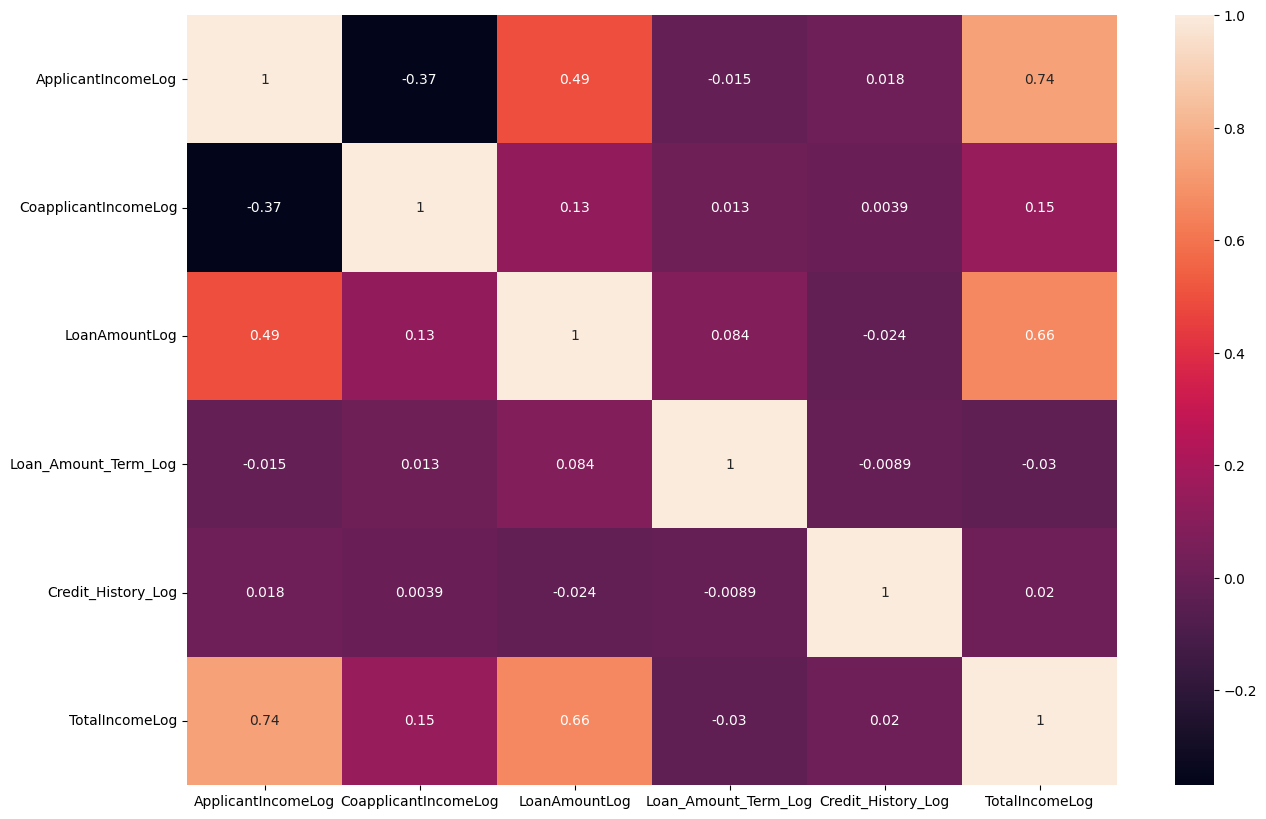

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

# Label_Encoding

In [ ]:
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le=LabelEncoder()
for c in cols:
    df[c]=le.fit_transform(df[c])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Credit_History_Log,TotalIncomeLog
0,1,0,0,0,0,2,1,8.674197,0.000000,4.993232,5.888878,0.693147,8.674197
1,1,1,1,0,0,0,0,8.430327,7.319202,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,2,1,8.006701,0.000000,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,2,1,7.857094,7.765993,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,2,1,8.699681,0.000000,4.955827,5.888878,0.693147,8.699681


In [ ]:
df.to_csv('loan_training.csv') 

In [20]:
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']

In [24]:
X['TotalIncome'].max()

81000.0

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,random_state=42,test_size=0.25)
x_train.shape

(460, 12)

In [ ]:
def model_selection(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,random_state=42,test_size=0.25)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model_selection(model,X,Y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model_selection(model,X,Y)

Accuracy is 72.07792207792207
Cross validation is 69.21897907503664


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
model_selection(model,X,Y)

Accuracy is 76.62337662337663
Cross validation is 78.66719978675197


In [ ]:
model=ExtraTreesClassifier()
model_selection(model,X,Y)

Accuracy is 74.67532467532467
Cross validation is 77.85152605624417


In [ ]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=25, max_depth=7, max_features=1)
model_selection(model,X,Y)

Accuracy is 77.27272727272727
Cross validation is 80.45715047314408


In [ ]:
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier(n_estimators=1000, min_samples_split=25, max_depth=7, max_features=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)


<AxesSubplot:>

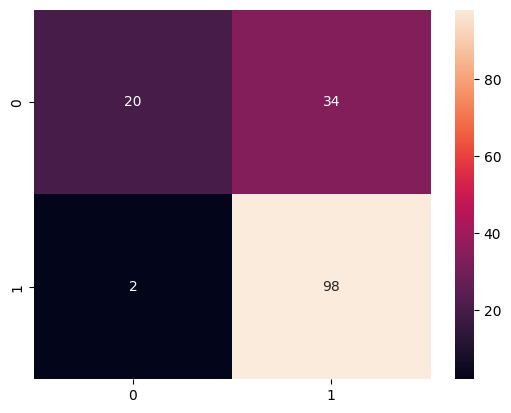

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
import joblib
joblib.dump(model, 'RF.C5')

['RF.C5']

# User Input

In [ ]:
lst = []
gender = int(input("Enter 1 if Male and 0 if Female :"))
lst.append(gender)
married = int(input("Enter 0 if unmarried and 1 if married :"))
lst.append(married)
depend = int(input("Dependents"))
lst.append(depend)
edu = int(input("Enter 0 if uneducated and 1 if educated :"))
lst.append(edu)
self_emp = int(input(" Enter 0 if umemployed and 1 if unemployed :"))
lst.append(self_emp)
area = int(input('''Enter Propertu_Area:
                  0 - Rural
                  1 - Semi-Urban
                  2 - Urban
                  '''))
lst.append(area)


applicant_inc = int(input("Enter applicant income :"))
app_inc = np.log(applicant_inc + 1)
lst.append(app_inc)

co_applicant_inc = float(input("Enter co-applicant income :"))
coapp_inc = np.log(co_applicant_inc + 1)
lst.append(coapp_inc)

loan_amount = float(input("Enter the loan amount :"))
loan_amt = np.log(loan_amount + 1)
lst.append(loan_amt)

loan_amt_term = float(input("Enter the loan amount term :"))
loan_amount_term = np.log(loan_amt_term + 1)
lst.append(loan_amt)

credit_his = float(input("Enter 1 if credit_card_holder else 0"))
credit_history = np.log(credit_his +1)
lst.append(credit_history)

total_income = applicant_inc + co_applicant_inc
total_inc = np.log(total_income)
lst.append(total_inc)

In [ ]:
prediction = model.predict([lst])
print(prediction[0])

1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
